# 1. K-최근접 이웃 회귀 모델

> 임의의 도미를 받고 무게를 예측

## 1) 회귀 (Regression)
- 임의의 수치를 예측하는 문제 
- 따라서 타깃 값도 임의의 수치 부여 

## 2) K-최근접 이웃 회귀 
- K-최근접 이웃 알고리즘을 이용해 회귀 문제를 해결 
- 가장 가까운 이웃 샘플을 찾고 평균을 잡아 예측 

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Matplotlib의 전역 폰트 설정
plt.rc('font', family='Pretendard')

# 마이너스 부호가 깨지는 현상 방지
plt.rc('axes', unicode_minus=False)


# 2. 회귀 모델 만들기 

## 1) 데이터 준비 

In [16]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

## 2) 산점도로 시각화 하여 데이터 특성 확인 

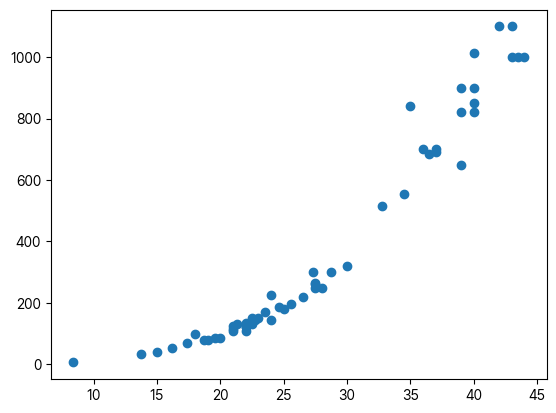

In [17]:
plt.scatter(perch_length,perch_weight)
plt.xlabel="legth"
plt.ylabel="weight"
plt.show()

## 3) 훈련 시작 

- 세트 나누기 

In [18]:
train_input, test_input,train_target,test_traget = train_test_split(perch_length,perch_weight)


- 나눠진 데이터는 1차원 배열
- 학습에는 2차원 배열이 필요하기 때문에 `reshape` 필요 
- `reshape(행,열)` 
  - `-1` 을 적으면 길이만큼 함 > 정확한 수를 쓰지 않아도 되서 좋음 

In [19]:
print(f"훈련세트 차원 확인 train_input.shape :  {train_input.shape} ")
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(f"훈련세트 차원 확인 train_input.shape :  {train_input.shape} ")

훈련세트 차원 확인 train_input.shape :  (42,) 
훈련세트 차원 확인 train_input.shape :  (42, 1) 


# 3. 결정 계수 (R squared) $R^2$
## 1) 결정 계수란 ? 
- 회귀에서 모델 평가를 하기 위한 점수
  - 특성이 타겟과 몇퍼센트나 같은지 설명 
  - 퍼센트이기 때문에 0~1의 값을 가짐 
  - 1에 가까울 수록 잘 설명함 
- 분류와 다르게 회귀에서 정확한 숫자를 맞추는 것은 거의 불가능 
- 따라서 예측하는 밧이나 타깃 모두 임의의 수치 
- 구하는 식  $R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$
  - 간단한 버전 : $R^2 = 1 - \frac{\sum_{i=1}^{n} (\text{타깃-예측)}2}{\sum_{i=1}^{n} (\text{타깃-평균})^2}
$

## 2) sklean의 mean_absolute_error
- 예측의 절대값 오차의 평균 반환 

In [21]:
### 회귀 객체 선언
knr = KNeighborsRegressor()

### 학습 
knr.fit(train_input,train_target)

### 평가 - R squared 값 
print(f"knr의 결정계수 값 : {knr.score(test_input,test_traget)}]")

knr의 결정계수 값 : 0.9680217235868374]


In [23]:
### 테스트 세트에 대한 예측을 만듦 
test_predict = knr.predict(test_input)

### 테스트 세트에 대한 평균 절대값 오차 계산 
mae = mean_absolute_error(test_traget,test_predict)
print(mae,"g 정도의 차이 발생")

37.69285714285714 g 정도의 차이 발생


# 4 ) 과대 적합 VS 과소 적합
- Overfitting : 훈련세트 Score > 테스트 Score 
  - 새로운 데이터에 대한 예측 잘 못함 
-  Overfitting : 훈련세트 Score > 테스트 Score 
   -  적절히 훈련되지 않음 

In [24]:
print("n_neighbors : ",knr.score(train_input,train_target))

### 이웃을 3명으로 줄임 
knr.n_neighbors = 3

knr.fit(train_input,train_target)

### 평가 - R squared 값 
print(f"knr의 결정계수 값 : {knr.score(test_input,test_traget)}]")


n_neighbors :  0.9710861078740705
knr의 결정계수 값 : 0.980988016506468]
